In [1]:
import pandas as pd
from sklearn.datasets import make_regression

# Generate data.
X, y = make_regression(
    n_samples=10000,
    n_features=20,
    n_informative=20,
    n_targets=3,
    random_state=42
);

In [2]:
# Create dataframe.
dfy = pd.DataFrame(y)
dfy = dfy.rename(columns=lambda x: 'Response' + str(x))
dfX = pd.DataFrame(X)
dfX = dfX.rename(columns=lambda x: 'Feature' + str(x))

df = pd.concat([dfy, dfX], axis=1)
df_new = df.copy()

In [3]:
# Modify Response1 to binary.
df_new['Response1'] = (df['Response1'] > 0)

# Modify Response2 to 5-class.
M, m = max(df['Response2']), min(df['Response2'])
interval = (M - m) / 5
for i in range(df.shape[0]):
    for j in range(5):
        if m + j * interval <= df.loc[i, 'Response2'] < m + (j + 1) * interval:
            df_new.loc[i, 'Response2'] = j
            break
    else:
        df_new.loc[i, 'Response2'] = 4

df_new[['Response1', 'Response2']] = df_new[['Response1', 'Response2']].astype('int')

In [4]:
# Modify Feature0 and Feature1 to binary.
df_new['Feature0'] = df['Feature0'] > 0
df_new['Feature1'] = df['Feature1'] > 0

# Modify Feature2 to Feature4 to 5-class.
for feature in range(2, 5):
    feature_name = 'Feature' + str(feature)
    M, m = max(df[feature_name]), min(df[feature_name])
    interval = (M - m) / 5
    for i in range(df.shape[0]):
        for j in range(4):
            if m + j * interval <= df.loc[i, feature_name] < m + (j + 1) * interval:
                df_new.loc[i, feature_name] = j
                break
        else:
            df_new.loc[i, feature_name] = 4

df_new[['Response1', 'Response2', 'Feature0', 'Feature1', 'Feature2', 'Feature3', 'Feature4']] = \
    df_new[['Response1', 'Response2', 'Feature0', 'Feature1', 'Feature2', 'Feature3', 'Feature4']].astype('int')

In [5]:
# See expected output bellow.

In [6]:
# Shape of the Dataframe.
df_new.shape

(10000, 23)

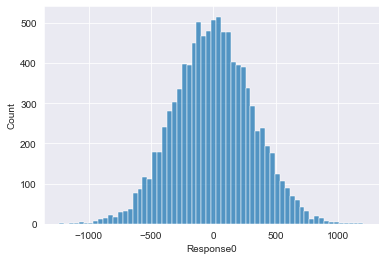

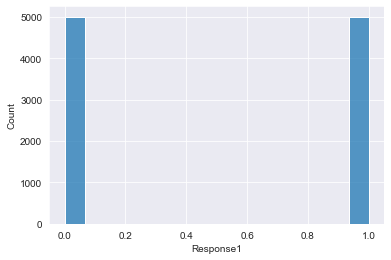

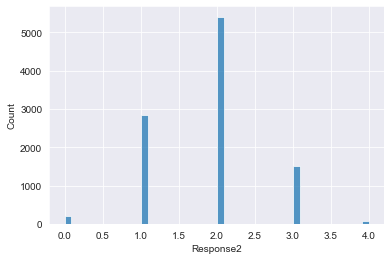

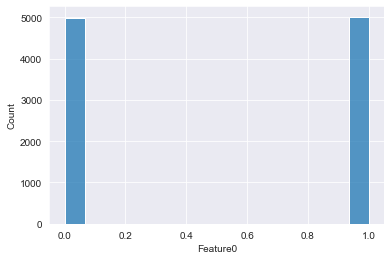

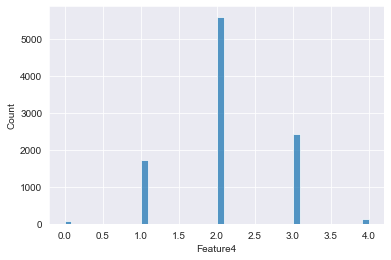

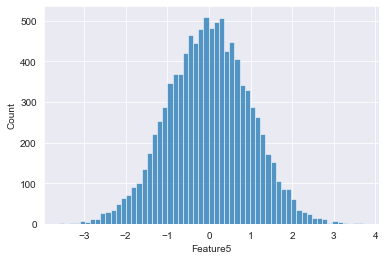

In [7]:
from matplotlib import pyplot as plt
import seaborn as sns

# Descriptive statistics and visuals of all three response columns and three features of your choice.
sns.histplot(data=df_new, x='Response0');
plt.show()
sns.histplot(data=df_new, x='Response1');
plt.show()
sns.histplot(data=df_new, x='Response2');
plt.show()
sns.histplot(data=df_new, x='Feature0');
plt.show()
sns.histplot(data=df_new, x='Feature4');
plt.show()
sns.histplot(data=df_new, x='Feature5');
plt.show()

In [8]:
# Correlation matrix of the numerical feature space.
df_new.loc[:, 'Feature5':'Feature19'].corr()

,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Feature13,Feature14,Feature15,Feature16,Feature17,Feature18,Feature19
Feature5,1.000000,0.001958,0.014995,0.021161,-0.013069,-0.010115,0.012007,0.017983,-0.003540,-0.017245,-0.009717,0.007203,-0.005289,0.004784,-0.007431
Feature6,0.001958,1.000000,0.003632,0.000319,-0.008837,-0.011966,-0.020665,0.002454,-0.003182,-0.003811,-0.008689,-0.004898,0.001501,0.002883,0.009035
Feature7,0.014995,0.003632,1.000000,0.000955,-0.003897,0.016716,0.009309,-0.008850,0.001545,0.009504,-0.006535,0.009616,0.006205,-0.001192,0.004377
Feature8,0.021161,0.000319,0.000955,1.000000,-0.027595,-0.016837,0.007756,0.002259,-0.003532,-0.008561,0.004035,0.006109,0.005241,0.010497,0.012208
Feature9,-0.013069,-0.008837,-0.003897,-0.027595,1.000000,-0.007787,-0.007994,-0.012781,0.007231,-0.001434,0.013487,-0.006405,-0.011129,-0.013919,-0.008265
Feature10,-0.010115,-0.011966,0.016716,-0.016837,-0.007787,1.000000,0.007533,-0.014270,0.001532,0.010412,0.008717,0.002484,-0.013175,0.004663,0.016347
Feature11,0.012007,-0.020665,0.009309,0.007756,-0.007994,0.007533,1.000000,0.001405,0.007227,0.019958,0.001649,0.001444,0.000770,0.008778,-0.000651
Feature12,0.017983,0.002454,-0.008850,0.002259,-0.012781,-0.014270,0.001405,1.000000,-0.000531,-0.012980,-0.017966,0.011923,0.011744,0.011386,0.021530
Feature13,-0.003540,-0.003182,0.001545,-0.003532,0.007231,0.001532,0.007227,-0.000531,1.000000,-0.001544,-0.024948,0.000638,-0.007183,0.001167,0.023567
Feature14,-0.017245,-0.003811,0.009504,-0.008561,-0.001434,0.010412,0.019958,-0.012980,-0.001544,1.000000,0.008203,0.001738,-0.007019,-0.011777,0.002800


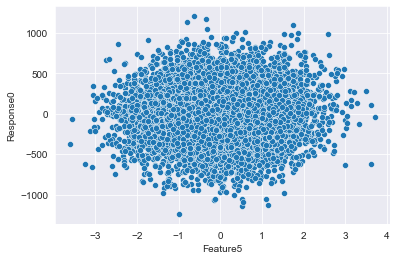

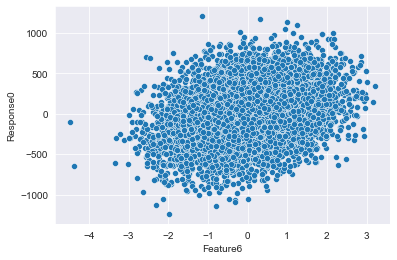

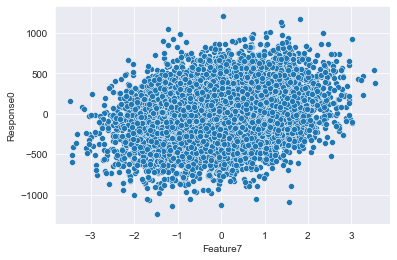

In [9]:
# Scatterplot depicting the linear correlated nature of the three columns.
sns.scatterplot(data=df_new, x='Feature5', y='Response0');
plt.show()
sns.scatterplot(data=df_new, x='Feature6', y='Response0');
plt.show()
sns.scatterplot(data=df_new, x='Feature7', y='Response0');
plt.show()

In [10]:
# Chi-square tests of the responses and categorical features.
from scipy.stats import chi2_contingency
import numpy as np

# 'Response1', 'Response2', 'Feature0', 'Feature1', 'Feature2', 'Feature3', 'Feature4'
obs = np.zeros((2, 5, 2, 2, 5, 5, 5))
for i in range(df_new.shape[0]):
    obs[df_new['Response1'][i]][df_new['Response2'][i]][df_new['Feature0'][i]][df_new['Feature1'][i]][df_new['Feature2'][i]][df_new['Feature3'][i]][df_new['Feature4'][i]] += 1

print(chi2_contingency(observed=obs))

(12973.282681638966, 0.0, 4980, array([[[[[[[5.07092463e-05, 1.22476916e-03, 3.94898256e-03,
             1.71848001e-03, 1.00009902e-04],
            [9.21217975e-04, 2.22499730e-02, 7.17398498e-02,
             3.12190536e-02, 1.81684656e-03],
            [2.33347049e-03, 5.63597941e-02, 1.81719014e-01,
             7.90787220e-02, 4.60212235e-03],
            [8.77269961e-04, 2.11885064e-02, 6.83173982e-02,
             2.97297042e-02, 1.73017131e-03],
            [4.31028594e-05, 1.04105378e-03, 3.35663517e-03,
             1.46070801e-03, 8.50084171e-05]],

           [[6.15692952e-04, 1.48706951e-02, 4.79470887e-02,
             2.08651500e-02, 1.21428332e-03],
            [1.11850886e-02, 2.70150960e-01, 8.71038777e-01,
             3.79050226e-01, 2.20594804e-02],
            [2.83321374e-02, 6.84299817e-01, 2.20636520e+00,
             9.60144655e-01, 5.58772709e-02],
            [1.06514881e-02, 2.57263024e-01, 8.29484634e-01,
             3.60967096e-01, 2.10071015e-02],
   

In [11]:
# T-tests between the three numerical features of your choice and Response 1.
from scipy.stats import ttest_ind

print(ttest_ind(df_new['Response2'], df_new['Feature5']))
print(ttest_ind(df_new['Response2'], df_new['Feature6']))
print(ttest_ind(df_new['Response2'], df_new['Feature7']))

Ttest_indResult(statistic=151.2059607627892, pvalue=0.0)
Ttest_indResult(statistic=149.9935812998542, pvalue=0.0)
Ttest_indResult(statistic=148.91818434584155, pvalue=0.0)
